# Data exploratory

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load dataset
ds = pd.read_excel("../data_sets/Supplementary_Dataset_S1.xlsx")
ds.head()

,Metabolite,Identification/Annotation,Mass,RT,Formula,Isomers,Patient_pre_1,Patient_pre_2,Patient_pre_3,Patient_pre_4,...,Patient_post_26,Patient_post_27,Patient_post_28,Patient_post_29,Patient_post_30,Patient_post_31,Patient_post_32,Patient_post_33,Patient_post_34,Patient_post_35
0,&gamma;-thiomethyl glutamate,Annotated,193.040414,12.388964,C6H11NO4S,1,12781.160160,13227.253910,10122.605470,13343.747070,...,4958.645508,10447.485350,8687.177734,12618.730470,2987.717773,11616.599610,18506.746090,14581.370120,11871.042970,11414.013670
1,(1-Ribosylimidazole)-4-acetate,Annotated,258.084978,12.007311,C10H14N2O6,3,13023.617190,23967.876950,12945.888670,13922.312500,...,60438.156250,10884.274410,15549.786130,13090.875000,3936.166748,13477.422850,14005.151370,11003.541020,38053.351560,19009.865230
2,(3S_6R)-6-Isopropenyl-3-methyl-2-oxo-oxepanone,Annotated,168.115128,4.257809,C10H16O2,60,7637.846191,15493.653320,10413.718750,12080.819340,...,14946.478520,20246.916020,12973.818360,12508.472660,2291.280029,28147.134770,10854.259770,17422.916020,12079.410160,15555.877930
3,(4E)-2-Oxohexenoic acid,Annotated,128.047463,10.357618,C6H8O3,9,4312.572266,2922.394531,7928.317871,7304.219727,...,3554.493164,2372.178223,3421.681885,1828.152344,1535.663208,4870.213867,3625.831543,4132.967285,871.309875,2981.673096
4,(4R_7S)-7-isopropyl-4-methyloxepan-2-one,Annotated,170.130819,4.166391,C10H18O2,22,36301.683590,80539.664060,42504.906250,48926.324220,...,76139.507810,83705.632810,64516.578130,48341.343750,4865.165527,69137.078130,29586.160160,84643.101560,27565.693360,49411.800780


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Metabolite                 536 non-null    object 
 1   Identification/Annotation  536 non-null    object 
 2   Mass                       536 non-null    float64
 3   RT                         536 non-null    float64
 4   Formula                    536 non-null    object 
 5   Isomers                    536 non-null    int64  
 6   Patient_pre_1              536 non-null    float64
 7   Patient_pre_2              536 non-null    float64
 8   Patient_pre_3              536 non-null    float64
 9   Patient_pre_4              536 non-null    float64
 10  Patient_pre_5              536 non-null    float64
 11  Patient_pre_6              536 non-null    float64
 12  Patient_pre_7              536 non-null    float64
 13  Patient_pre_8              536 non-null    float64

## Data types

In [8]:
ds.dtypes

Metabolite                    object
Identification/Annotation     object
Mass                         float64
RT                           float64
Formula                       object
                              ...   
Patient_post_31              float64
Patient_post_32              float64
Patient_post_33              float64
Patient_post_34              float64
Patient_post_35              float64
Length: 76, dtype: object

Each metabolite is composed by:
* string(3): Name, Identification/Annotation, Formula
* int64(1): Isomers
* float64(72): Mass, RT, Patient_pre_\[1, 35\], Patient_post_\[1, 35\]

In [9]:
# Get non categorical (continuous) variables
num_var = list(ds._get_numeric_data().columns)
num_var

['Mass',
 'RT',
 'Isomers',
 'Patient_pre_1',
 'Patient_pre_2',
 'Patient_pre_3',
 'Patient_pre_4',
 'Patient_pre_5',
 'Patient_pre_6',
 'Patient_pre_7',
 'Patient_pre_8',
 'Patient_pre_9',
 'Patient_pre_10',
 'Patient_pre_11',
 'Patient_pre_12',
 'Patient_pre_13',
 'Patient_pre_14',
 'Patient_pre_15',
 'Patient_pre_16',
 'Patient_pre_17',
 'Patient_pre_18',
 'Patient_pre_19',
 'Patient_pre_20',
 'Patient_pre_21',
 'Patient_pre_22',
 'Patient_pre_23',
 'Patient_pre_24',
 'Patient_pre_25',
 'Patient_pre_26',
 'Patient_pre_27',
 'Patient_pre_28',
 'Patient_pre_29',
 'Patient_pre_30',
 'Patient_pre_31',
 'Patient_pre_32',
 'Patient_pre_33',
 'Patient_pre_34',
 'Patient_pre_35',
 'Patient_post_1',
 'Patient_post_2',
 'Patient_post_3',
 'Patient_post_4',
 'Patient_post_5',
 'Patient_post_6',
 'Patient_post_7',
 'Patient_post_8',
 'Patient_post_9',
 'Patient_post_10',
 'Patient_post_11',
 'Patient_post_12',
 'Patient_post_13',
 'Patient_post_14',
 'Patient_post_15',
 'Patient_post_16',
 'Pat

In [10]:
# Get categorical variables
cat_var = list(set(ds.columns) - set(num_var))
cat_var

['Identification/Annotation', 'Formula', 'Metabolite']

### Inspect numeric columns

In [11]:
ds.describe()

,Mass,RT,Isomers,Patient_pre_1,Patient_pre_2,Patient_pre_3,Patient_pre_4,Patient_pre_5,Patient_pre_6,Patient_pre_7,...,Patient_post_26,Patient_post_27,Patient_post_28,Patient_post_29,Patient_post_30,Patient_post_31,Patient_post_32,Patient_post_33,Patient_post_34,Patient_post_35
count,536.000000,536.000000,536.000000,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,...,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02
mean,270.349957,8.611521,7.720149,3.660896e+05,3.486344e+05,3.523820e+05,3.560058e+05,3.359450e+05,2.905780e+05,3.699269e+05,...,3.069630e+05,3.169333e+05,3.433318e+05,3.563565e+05,1.345655e+05,3.195990e+05,3.960020e+05,3.278436e+05,2.797303e+05,3.551048e+05
std,177.846330,4.225044,10.557189,1.911145e+06,1.844740e+06,1.889203e+06,1.923058e+06,1.924143e+06,1.468902e+06,2.255879e+06,...,1.618306e+06,1.678074e+06,1.723859e+06,1.958239e+06,7.083225e+05,1.745927e+06,2.361226e+06,1.755184e+06,1.676467e+06,1.907198e+06
min,72.057485,3.515490,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.556620e+02,3.300641e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,3.659886e+02,0.000000e+00,4.119416e+02,3.655924e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,158.081783,4.339342,2.000000,4.856964e+03,5.283209e+03,4.663862e+03,5.371290e+03,4.325315e+03,5.266463e+03,5.000447e+03,...,4.293101e+03,4.297742e+03,5.633274e+03,5.349546e+03,1.638731e+03,5.061234e+03,5.851304e+03,4.867351e+03,4.212309e+03,5.123886e+03
50%,212.593814,8.714866,4.000000,1.567699e+04,1.848741e+04,1.586747e+04,1.799222e+04,1.502551e+04,1.562687e+04,1.640873e+04,...,1.557250e+04,1.507418e+04,1.802458e+04,1.691456e+04,5.637016e+03,1.535401e+04,1.762616e+04,1.745385e+04,1.375099e+04,1.704351e+04
75%,296.464806,12.119554,10.000000,6.670866e+04,6.331093e+04,5.812501e+04,6.017058e+04,5.968780e+04,6.131178e+04,5.958456e+04,...,6.765685e+04,5.439681e+04,6.126979e+04,5.734316e+04,2.286112e+04,6.494686e+04,6.388203e+04,6.211226e+04,5.707419e+04,6.316591e+04
max,879.583439,22.087651,84.000000,2.336664e+07,2.435565e+07,2.249358e+07,2.159918e+07,2.488990e+07,1.684253e+07,3.573507e+07,...,2.130870e+07,2.048896e+07,1.851545e+07,2.154708e+07,7.277340e+06,2.259540e+07,2.809843e+07,2.515171e+07,2.114374e+07,2.451319e+07


## Missing data

In [12]:
(ds.isnull().sum()/ds.shape[0]) * 100

Metabolite                   0.0
Identification/Annotation    0.0
Mass                         0.0
RT                           0.0
Formula                      0.0
                            ... 
Patient_post_31              0.0
Patient_post_32              0.0
Patient_post_33              0.0
Patient_post_34              0.0
Patient_post_35              0.0
Length: 76, dtype: float64

There is no null value in the metabolites data set

## Patients dataframes

In [13]:
# Load treatment outcomes
outcomes = pd.read_excel("../data_sets/Supplementary_Dataset_S1.xlsx", sheet_name=1)
outcomes.head()

,samples,Treatemnt outcome
0,Patient_1,cure
1,Patient_2,cure
2,Patient_3,cure
3,Patient_4,cure
4,Patient_5,cure


## Target Variable Trend

(array([22.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

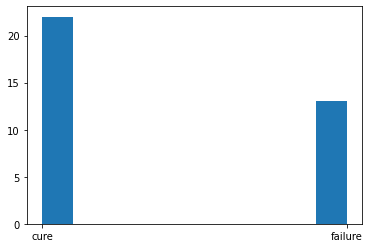

In [14]:
plt.hist(outcomes["Treatemnt outcome"])

Columns: metabolites pre, metabolites post

Rows: Patients

In [18]:
# Columns are each metabolite before treatment and each metabolite after treatment
ds1_cols = [f"{m}_pre" for m in range(ds.shape[0])] + \
    [f"{m}_post" for m in range(ds.shape[0])]

In [19]:
# Rows are each patient
n_patients = int((ds.shape[1] - 6) / 2)
ds1_rows = [
    np.concatenate((np.array(ds[f'Patient_pre_{p}']),np.array(ds[f'Patient_post_{p}'])))
    for p in range(1, n_patients + 1)
]

In [20]:
# Create data frame
ds1 = pd.DataFrame(ds1_rows, columns=ds1_cols)
# Add target column
ds1['y'] = outcomes['Treatemnt outcome'] == "cure"
ds1

,0_pre,1_pre,2_pre,3_pre,4_pre,5_pre,6_pre,7_pre,8_pre,9_pre,...,527_post,528_post,529_post,530_post,531_post,532_post,533_post,534_post,535_post,y
0,12781.160160,13023.617190,7637.846191,4312.572266,36301.68359,6.867976e+05,85113.781250,4290.965332,2.709745e+05,41511.82422,...,538699.1875,91547.28125,26786.001950,12853.868160,4096.142578,4117.774902,50739.207030,1677.144287,5178.986328,True
1,13227.253910,23967.876950,15493.653320,2922.394531,80539.66406,4.620728e+05,84456.882810,5276.038574,8.744241e+04,39890.93359,...,643461.8125,58183.94141,29228.640630,10554.833010,4145.901367,3771.996582,24112.179690,17484.777340,2493.593262,True
2,10122.605470,12945.888670,10413.718750,7928.317871,42504.90625,6.120502e+05,43188.925780,4376.491211,4.880815e+05,38950.03516,...,557195.6875,111246.54690,19829.453130,5055.417969,848.069519,7285.378418,39987.894530,1590.354370,2588.685059,True
3,13343.747070,13922.312500,12080.819340,7304.219727,48926.32422,5.544005e+05,93529.210940,5212.500488,1.081802e+06,38103.93750,...,573969.1250,100035.77340,24185.882810,6081.456543,1879.115723,3358.707764,43222.652340,11613.234380,1476.407959,True
4,11886.784180,27445.011720,9575.403320,3838.025879,7354.43457,3.840624e+04,4832.499023,5291.332031,2.550203e+05,44519.20313,...,914524.7500,138855.03130,30385.556640,3615.894775,3641.177490,6749.343262,28545.833980,2022.740479,3390.471680,True
5,8514.902344,16926.119140,10756.682620,5024.931641,27245.81055,2.845268e+05,25366.205080,2948.379150,2.355447e+05,31889.31641,...,599076.6250,105117.09380,31420.394530,3993.579102,5037.517090,5423.530762,53416.863280,5904.738770,4261.810059,True
6,12666.652340,29208.330080,15429.401370,2075.650391,64506.26953,3.531609e+05,37458.816410,3094.858643,6.257879e+05,19608.50977,...,229509.1563,22639.59961,6644.923828,575.754578,418.703674,2657.068848,21776.988280,252.614639,528.917236,True
7,6785.493652,13211.656250,15777.287110,2970.849121,74097.73438,5.991748e+05,64121.894530,5765.131348,1.067479e+05,29300.42969,...,793292.2500,98324.24219,22737.089840,6077.202148,3207.498779,10259.933590,41542.542970,754.111084,2019.420410,True
8,9930.693359,20924.667970,12775.551760,2872.193359,62568.08984,7.760521e+05,61190.585940,4265.518555,2.172283e+05,39699.50391,...,746354.5000,76691.17969,20624.978520,5077.819336,1770.080200,4916.973633,12770.827150,2218.166504,3407.802979,True
9,8338.142578,14541.921880,16553.609380,2908.000488,67137.80469,8.167571e+05,56991.941410,6496.931152,1.237539e+05,90300.48438,...,651963.1875,53253.32422,23715.154300,3677.385254,4030.543701,4863.954102,18246.595700,3941.543213,2323.753174,True


Columns: metabolites

Rows: patients pre

In [7]:
# Columns are each metabolite
ds2_cols = [m for m in range(ds.shape[0])]

In [8]:
# Rows are each patient pre
n_patients = int((ds.shape[1] - 6) / 2)
ds2_rows = [np.array(ds[f'Patient_pre_{p}']) for p in range(1, n_patients + 1)]

In [9]:
# Create data frame
ds2 = pd.DataFrame(ds2_rows, columns=ds2_cols)
# Add target column
ds2['y'] = outcomes['Treatemnt outcome'] == "cure"
ds2

,0,1,2,3,4,5,6,7,8,9,...,527,528,529,530,531,532,533,534,535,y
0,12781.160160,13023.617190,7637.846191,4312.572266,36301.68359,6.867976e+05,85113.781250,4290.965332,2.709745e+05,41511.82422,...,624578.18750,79408.01563,26254.31250,7415.603027,1575.383423,3858.673096,12726.140630,2731.017578,2873.173340,True
1,13227.253910,23967.876950,15493.653320,2922.394531,80539.66406,4.620728e+05,84456.882810,5276.038574,8.744241e+04,39890.93359,...,796816.93750,99684.13281,33561.46094,4947.357422,4676.434570,4950.031250,12599.176760,5660.225586,2608.797119,True
2,10122.605470,12945.888670,10413.718750,7928.317871,42504.90625,6.120502e+05,43188.925780,4376.491211,4.880815e+05,38950.03516,...,714536.31250,102415.13280,28715.66602,5563.428223,3275.547607,8176.732910,16635.501950,3074.649170,1528.793335,True
3,13343.747070,13922.312500,12080.819340,7304.219727,48926.32422,5.544005e+05,93529.210940,5212.500488,1.081802e+06,38103.93750,...,652670.31250,109246.76560,25427.25000,3065.382813,2606.009521,4635.400391,8650.053711,4626.319824,2046.959595,True
4,11886.784180,27445.011720,9575.403320,3838.025879,7354.43457,3.840624e+04,4832.499023,5291.332031,2.550203e+05,44519.20313,...,761062.06250,133911.21880,27870.75391,3764.118164,3745.776855,7395.415039,5185.240723,1666.588257,1930.175171,True
5,8514.902344,16926.119140,10756.682620,5024.931641,27245.81055,2.845268e+05,25366.205080,2948.379150,2.355447e+05,31889.31641,...,594151.87500,86857.58594,26258.56055,2861.586182,2234.290283,6644.330078,9479.162109,5800.515137,2376.247070,True
6,12666.652340,29208.330080,15429.401370,2075.650391,64506.26953,3.531609e+05,37458.816410,3094.858643,6.257879e+05,19608.50977,...,625135.50000,112946.03910,28121.15234,6839.744629,1168.265137,9151.547852,48421.171880,895.096069,3524.081543,True
7,6785.493652,13211.656250,15777.287110,2970.849121,74097.73438,5.991748e+05,64121.894530,5765.131348,1.067479e+05,29300.42969,...,659852.12500,92487.88281,23546.06055,7759.174316,2835.639160,6090.628906,12136.355470,1981.047241,2965.943359,True
8,9930.693359,20924.667970,12775.551760,2872.193359,62568.08984,7.760521e+05,61190.585940,4265.518555,2.172283e+05,39699.50391,...,578932.18750,114531.37500,32455.43359,3319.239990,4756.895996,6277.558594,13988.702150,1173.914673,7867.719238,True
9,8338.142578,14541.921880,16553.609380,2908.000488,67137.80469,8.167571e+05,56991.941410,6496.931152,1.237539e+05,90300.48438,...,893581.75000,107147.65630,21798.84570,3399.462158,3680.008301,8304.183594,6917.561035,3247.714355,3061.731445,True


Columns: metabolites

Rows: patients pre, patients post

In [10]:
# Columns are each metabolite
ds3_cols = [m for m in range(ds.shape[0])]

In [11]:
# Rows are each patient post
n_patients = int((ds.shape[1] - 6) / 2)
ds3_rows = [np.array(ds[f'Patient_post_{p}']) for p in range(1, n_patients + 1)]

In [12]:
# Create data frame
ds3 = pd.DataFrame(ds3_rows, columns=ds3_cols)
# Add target column
ds3['y'] = outcomes['Treatemnt outcome'] == "cure"
ds3

,0,1,2,3,4,5,6,7,8,9,...,527,528,529,530,531,532,533,534,535,y
0,15197.811520,15137.795900,13824.332030,3886.181641,44213.273440,6.142807e+05,59331.636720,4037.038330,2.025980e+05,21478.755860,...,538699.1875,91547.28125,26786.001950,12853.868160,4096.142578,4117.774902,50739.207030,1677.144287,5178.986328,True
1,12192.238280,21360.441410,9971.500000,3381.012695,41295.734380,5.022972e+05,32046.601560,5163.633789,9.332052e+04,45638.062500,...,643461.8125,58183.94141,29228.640630,10554.833010,4145.901367,3771.996582,24112.179690,17484.777340,2493.593262,True
2,9794.058594,10355.114260,11419.612300,8838.534180,65490.664060,1.383140e+06,78672.140630,1794.260254,1.794588e+05,20975.394530,...,557195.6875,111246.54690,19829.453130,5055.417969,848.069519,7285.378418,39987.894530,1590.354370,2588.685059,True
3,8328.241211,12858.301760,7068.033691,4751.857910,34073.453130,6.939534e+05,58468.113280,1805.435913,4.343280e+05,21998.611330,...,573969.1250,100035.77340,24185.882810,6081.456543,1879.115723,3358.707764,43222.652340,11613.234380,1476.407959,True
4,9363.958008,17715.197270,10046.553710,3563.136475,43344.566410,3.469041e+05,34618.796880,3753.905762,6.695344e+05,79115.890630,...,914524.7500,138855.03130,30385.556640,3615.894775,3641.177490,6749.343262,28545.833980,2022.740479,3390.471680,True
5,10436.958010,18300.255860,14812.609380,5018.631348,48729.835940,1.876051e+05,31809.775390,2786.377197,1.610184e+06,18068.074220,...,599076.6250,105117.09380,31420.394530,3993.579102,5037.517090,5423.530762,53416.863280,5904.738770,4261.810059,True
6,3591.131836,6639.097656,3956.794434,800.513794,13308.079100,2.392688e+05,20475.427730,921.859680,8.962449e+04,7806.132813,...,229509.1563,22639.59961,6644.923828,575.754578,418.703674,2657.068848,21776.988280,252.614639,528.917236,True
7,15442.977540,21300.115230,22227.330080,3203.901855,110988.546900,1.985211e+06,115973.343800,4001.095947,8.600210e+05,21834.091800,...,793292.2500,98324.24219,22737.089840,6077.202148,3207.498779,10259.933590,41542.542970,754.111084,2019.420410,True
8,7715.913574,19429.050780,7770.894043,3512.696533,29452.695310,3.284794e+05,25904.333980,2677.121582,1.273017e+06,48289.703130,...,746354.5000,76691.17969,20624.978520,5077.819336,1770.080200,4916.973633,12770.827150,2218.166504,3407.802979,True
9,9926.803711,11030.582030,6313.438477,2245.176270,16201.741210,2.025123e+05,15109.178710,4253.385254,9.094949e+04,46779.996090,...,651963.1875,53253.32422,23715.154300,3677.385254,4030.543701,4863.954102,18246.595700,3941.543213,2323.753174,True


In [ ]:
# Scripts for visualization
!git clone https://github.com/omarcastano/JaverianaML.git

## Data visualization

In [ ]:
l = len(patients_cols)
chart_cols = 5
for limit in range(chart_cols, l-(l%chart_cols), 5):
    pu.seabornhistograms(data=patients, variables=patients_cols[limit-5: limit])
# pu.seabornhistograms(data=patients, variables=patients_cols[l-l%chart_cols:])

## Correlation matrix

In [29]:
ds2.corr()

,0,1,2,3,4,5,6,7,8,9,...,527,528,529,530,531,532,533,534,535,y
0,1.000000,0.006563,-0.021272,0.093064,-0.141261,-0.214659,-0.024518,0.018198,-0.007112,-0.248273,...,-0.189252,0.147974,-0.415255,0.050157,-0.349878,-0.158813,0.034613,0.048683,-0.005117,-0.298256
1,0.006563,1.000000,0.366944,-0.076156,0.299178,0.456476,0.410254,-0.025511,-0.060661,-0.054801,...,0.010624,0.109034,-0.053774,-0.114095,-0.013487,-0.147600,0.022662,-0.092444,0.094865,-0.206988
2,-0.021272,0.366944,1.000000,0.072751,0.704979,0.519059,0.464007,0.077944,0.015063,0.020561,...,0.057001,0.043336,-0.221673,-0.094554,0.043956,0.055889,0.011750,-0.220608,0.136089,0.172532
3,0.093064,-0.076156,0.072751,1.000000,-0.016397,-0.008119,0.016846,0.315630,0.137092,0.105593,...,0.000339,0.274593,0.086898,-0.065353,0.269928,-0.282241,-0.112642,0.033574,-0.179496,0.136695
4,-0.141261,0.299178,0.704979,-0.016397,1.000000,0.782414,0.799215,-0.096061,-0.038632,-0.020688,...,0.142667,0.126904,-0.060562,-0.142491,0.033373,0.122709,0.110309,-0.131098,0.066860,0.195944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,-0.158813,-0.147600,0.055889,-0.282241,0.122709,-0.114542,-0.090884,0.006258,-0.237630,-0.019759,...,0.076611,0.065934,-0.162628,0.000234,-0.100382,1.000000,0.257756,-0.155534,0.024562,0.014832
533,0.034613,0.022662,0.011750,-0.112642,0.110309,0.016363,0.033024,-0.163209,0.126835,-0.305380,...,-0.003806,0.492545,0.292785,0.365040,-0.007976,0.257756,1.000000,-0.144549,0.014974,-0.101382
534,0.048683,-0.092444,-0.220608,0.033574,-0.131098,-0.213283,-0.175057,-0.121924,-0.073168,-0.043533,...,0.016667,-0.013415,-0.072596,0.110730,-0.177043,-0.155534,-0.144549,1.000000,-0.100945,0.162863
535,-0.005117,0.094865,0.136089,-0.179496,0.066860,0.053661,-0.050188,0.237254,-0.089269,-0.027987,...,0.112838,0.030773,-0.063854,-0.028307,0.147102,0.024562,0.014974,-0.100945,1.000000,-0.023681


In [17]:
ds3.corr()

,0,1,2,3,4,5,6,7,8,9,...,527,528,529,530,531,532,533,534,535,y
0,1.000000,-0.090090,0.342619,0.202494,0.146010,-0.062252,-0.076859,0.669062,0.202590,0.072630,...,0.463149,0.131191,0.458808,0.422815,0.410879,0.239915,0.032892,0.258136,0.322208,-0.121707
1,-0.090090,1.000000,0.060513,-0.026220,0.175095,0.274109,0.301190,-0.032788,0.161024,0.005396,...,0.137400,0.232365,0.060645,0.111167,-0.150010,0.033225,0.023165,0.218884,0.162338,-0.130252
2,0.342619,0.060513,1.000000,0.326895,0.723710,0.417927,0.390340,0.131836,-0.076727,-0.071276,...,0.322954,0.336528,0.219131,0.337178,0.223950,0.480116,0.125696,-0.121686,0.153093,-0.249802
3,0.202494,-0.026220,0.326895,1.000000,0.246246,0.094945,0.070185,0.219486,0.274704,0.012171,...,0.154018,0.323281,0.091439,0.176593,0.111881,-0.024538,0.294130,0.244311,0.369499,0.293533
4,0.146010,0.175095,0.723710,0.246246,1.000000,0.801727,0.819214,0.082102,-0.129404,-0.105964,...,0.115501,0.133706,0.302240,0.147683,0.228503,0.419823,0.278465,-0.163887,0.087006,-0.231073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,0.239915,0.033225,0.480116,-0.024538,0.419823,0.350099,0.263292,0.141910,-0.107757,0.076017,...,0.439094,0.417739,0.260526,0.203278,0.352255,1.000000,0.011345,-0.219341,-0.019659,0.049120
533,0.032892,0.023165,0.125696,0.294130,0.278465,0.260222,0.233232,-0.162727,0.062699,-0.295142,...,-0.117945,0.070593,0.302540,-0.201250,0.253703,0.011345,1.000000,0.025054,0.480994,0.044810
534,0.258136,0.218884,-0.121686,0.244311,-0.163887,-0.240669,-0.215313,0.388267,0.248538,0.160887,...,0.158820,0.018478,0.266096,0.195787,0.270661,-0.219341,0.025054,1.000000,0.182666,0.180477
535,0.322208,0.162338,0.153093,0.369499,0.087006,-0.120349,-0.064710,0.308653,0.273102,-0.040978,...,0.247671,0.225554,0.210073,0.095204,0.367311,-0.019659,0.480994,0.182666,1.000000,0.099902


## Export dataframes to csv

In [21]:
# Columns are metabolites pre and pos, 35 patients
ds1_path = "../data_sets/ds1.csv"
# Columns are metabolites, 35 patients (pre)
ds2_path = "../data_sets/ds2.csv"
# Columns are metabolites, 35 patients (post)
ds3_path = "../data_sets/ds3.csv"

In [22]:
# Write dataframe
ds1.to_csv(ds1_path, index=False)
ds2.to_csv(ds2_path, index=False)
ds3.to_csv(ds3_path, index=False)